# Exploratory Data Analysis (E.D.A)
Analisis Exploratorio de los datos

Luego de haber hecho una profunda limpieza y transformación de los datos en el proceso de ETL y de haber desarrollado la API y sus respectivas funciones, es hora de explorar los datos. 
- ¿Como se comportan?
- ¿Como es la distribucion de los mismos?
- ¿Cuales son las correlaciones que existen entre ellos?

### Preguntas a tener en cuenta
- ¿Cuál es el tamaño de mi conjunto de datos? ¿Cuántas observaciones y características contiene?
- ¿Cuáles son las variables presentes en los datos y qué tipo de datos representan (numéricos, categóricos, texto, fechas, etc.)?
- ¿Existen valores perdidos en los datos? ¿Cuál es la cantidad y distribución de los valores perdidos?
- ¿Cuál es la distribución de cada variable numérica? ¿Presentan sesgo o asimetría?
- ¿Cuáles son los valores mínimos, máximos, medios y medianos de las variables numéricas? ¿Existen valores atípicos?
- ¿Cuáles son las categorías presentes en las variables categóricas? ¿Cuántas instancias hay en cada categoría?
- ¿Hay correlaciones entre las variables numéricas? ¿Qué variables están fuertemente correlacionadas?
- ¿Existen patrones o tendencias en los datos a lo largo del tiempo? ¿Es necesario considerar alguna temporalidad?
- ¿Cómo se distribuyen las variables en diferentes subgrupos o categorías? ¿Hay diferencias significativas entre ellos?
- ¿Qué variables podrían ser predictoras o influyentes para la variable objetivo que estás analizando?
- ¿Existen relaciones no lineales o interacciones entre las variables? ¿Es necesario considerar transformaciones o crear nuevas variables derivadas?
- ¿Cuáles son las principales características o atributos más relevantes en el contexto de tu análisis?
- ¿Hay duplicados o registros repetidos en los datos que deban ser tratados?
- ¿Existen valores incoherentes o inconsistentes en las variables que requieren validación o limpieza?
- ¿Cuál es la frecuencia o conteo de eventos en variables específicas? ¿Hay alguna distribución anómala?
- ¿Se presentan patrones espaciales en los datos? ¿Es necesario considerar la ubicación geográfica como factor relevante?
- ¿Qué información adicional o externa podría enriquecer tu análisis de datos? ¿Hay fuentes de datos adicionales disponibles?
- ¿Existe alguna relación de causa y efecto que deba investigarse más a fondo?
- ¿Cuáles son las suposiciones o limitaciones importantes de tus datos? ¿Hay algún sesgo o problema potencial?
- ¿Cuál es el objetivo final de tu análisis exploratorio y qué preguntas específicas deseas responder a partir de los datos?

In [3]:
# Importo las librerias necesarias para el analisis exploratorio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
movies = pd.read_csv('../../final_data/combined_data.csv')

In [5]:
movies.head(3)

,belongs_to_collection,budget,genres,movie_id,original_language,overview,popularity,production_companies,production_countries,release_date,...,title,vote_average,vote_count,production_countries_code,release_year,release_month,release_day,return,director,actors
0,Toy Story Collection,30000000.0,Animation|Comedy|Family,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,...,Toy Story,7.7,5415.0,US,1995,10,30,12.451801,John Lasseter,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1,NaN,65000000.0,Adventure|Family|Fantasy,8844,en,When siblings Judy and Peter discover an encha...,17.015539,Interscope Communications|Teitler Film|TriStar...,United States of America,1995-12-15,...,Jumanji,6.9,2413.0,US,1995,12,15,4.043035,Joe Johnston,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2,Grumpy Old Men Collection,0.0,Comedy|Romance,15602,en,A family wedding reignites the ancient feud be...,11.712900,Lancaster Gate|Warner Bros.,United States of America,1995-12-22,...,Grumpier Old Men,6.5,92.0,US,1995,12,22,0.000000,Howard Deutch,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...


##### Empiezo por averiguar cual es el tamaño de mi conjunto de datos y cuantas columnas tiene

In [6]:
print('Filas',movies.shape[0])
print('Columnas',movies.shape[1])

Filas 45344
Columnas 25


In [7]:
print('Tipos de datos presentes en el dataset:')
movies.info()

Tipos de datos presentes en el dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45344 entries, 0 to 45343
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   belongs_to_collection      4486 non-null   object 
 1   budget                     45344 non-null  float64
 2   genres                     42961 non-null  object 
 3   movie_id                   45344 non-null  int64  
 4   original_language          45333 non-null  object 
 5   overview                   44403 non-null  object 
 6   popularity                 45344 non-null  float64
 7   production_companies       33441 non-null  object 
 8   production_countries       39136 non-null  object 
 9   release_date               45344 non-null  object 
 10  revenue                    45344 non-null  float64
 11  runtime                    45098 non-null  float64
 12  spoken_languages           41453 non-null  object 
 13  status

Hay 14 variables de texto y 11 variables numericas

Veo informacion estadistica de las columnas numericas

In [8]:
movies.describe()

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,release_day,return
count,4.534400e+04,45344.000000,45344.000000,4.534400e+04,45098.000000,45344.000000,45344.000000,45344.000000,45344.000000,45344.000000,4.534400e+04
mean,4.232665e+06,108034.805244,2.926297,1.123415e+07,94.174841,5.624206,110.139930,1991.800371,6.457436,14.201813,6.605083e+02
std,1.744410e+07,112184.704293,6.011079,6.441127e+07,38.351134,1.915351,491.909628,25.853092,3.628729,9.289335,7.471964e+04
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,26388.750000,0.388795,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,3.000000,6.000000,0.000000e+00
50%,0.000000e+00,59849.500000,1.130285,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,7.000000,14.000000,0.000000e+00
75%,0.000000e+00,156598.500000,3.689690,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,10.000000,22.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,12.000000,31.000000,1.239638e+07


Busco si hay valores 'perdidos' en los datos y si los hay, cual es su ditribucion?

In [28]:
nulos = movies.isnull().sum()
print(nulos)

belongs_to_collection        40858
budget                           0
genres                        2383
movie_id                         0
original_language               11
overview                       941
popularity                       0
production_companies         11903
production_countries          6208
release_date                     0
revenue                          0
runtime                        246
spoken_languages              3891
status                          80
tagline                      24956
title                            0
vote_average                     0
vote_count                       0
production_countries_code     6208
release_year                     0
release_month                    0
release_day                      0
return                           0
director                       837
actors                        2350
dtype: int64


Porcentaje de nulos en el dataset

In [29]:
percent = (nulos / len(movies)) * 100
print(percent)

belongs_to_collection        90.106740
budget                        0.000000
genres                        5.255381
movie_id                      0.000000
original_language             0.024259
overview                      2.075247
popularity                    0.000000
production_companies         26.250441
production_countries         13.690896
release_date                  0.000000
revenue                       0.000000
runtime                       0.542519
spoken_languages              8.581069
status                        0.176429
tagline                      55.037050
title                         0.000000
vote_average                  0.000000
vote_count                    0.000000
production_countries_code    13.690896
release_year                  0.000000
release_month                 0.000000
release_day                   0.000000
return                        0.000000
director                      1.845889
actors                        5.182604
dtype: float64


El 90% de los datos de la columan belongs_to_collection son nulos

Para comprender la simetria que tiene cada variable numerica, utilizo *.skew* que devuelve el coeficiente de asimetria de la columna. Mientras mas cercano a cero significa que los datos de la variable tiene una distribución simetrica. De lo contrario, mientras mas alejado del 0, ya sea por encima o por debajo (positivo o negativo) significa que los datos tiene diferentes grados de asimetria.

Con esto puedo comprender que tan simetrica es una variable

In [33]:
simetria = movies.skew()
print('Varibales con distribuciones simetricas:')
simetria[(simetria <= 1.5) & (simetria >= -0.5)]
# En este caso, considero a una varibale como simetrica cuando su valor esta entre -0.5 y 1.5

Varibales con distribuciones simetricas:


movie_id         1.282945
release_month   -0.072118
release_day      0.103220
dtype: float64

Estas variable son las que tienen un mayor grado de simetria en todo el dataset

In [12]:
print('Varibales con distribuciones asimetricas:')
simetria[(simetria > 1.5) | (simetria < -0.6)]

Varibales con distribuciones asimetricas:


budget            7.117849
popularity       29.215063
revenue          12.250996
runtime           4.490305
vote_average     -1.524360
vote_count       10.437268
release_year    -11.076045
return          138.280737
dtype: float64

In [52]:
año_minimo = movies.release_year.loc[(movies.release_year != 0) & (movies.release_date.isnull() == False)].min()
año_maximo = movies.release_year.loc[(movies.release_year != 0) & (movies.release_date.isnull() == False)].max()
print(f'Hay datos que van desde el año {año_minimo} hasta el {año_maximo}')
print(f'Hay peliculas dentro de un rango de {año_maximo - año_minimo} años')

Hay datos que van desde el año 1874 hasta el 2020
Hay peliculas dentro de un rango de 146 años


(1870.0, 2020.0)

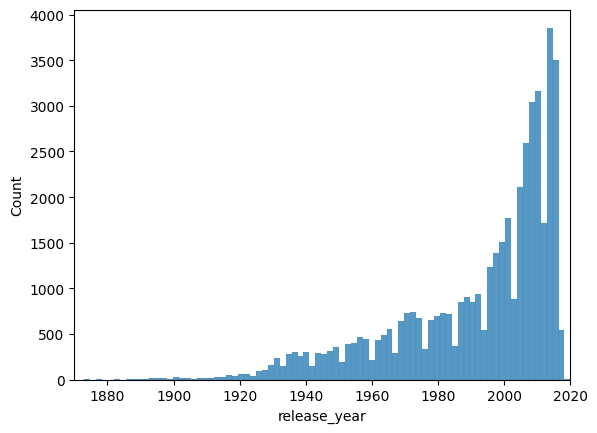

In [55]:
sns.histplot(movies.release_year)
plt.xlim((1870,2020))

A trves de este grafico podria uno deducir que cuando se le consulte a la API por recomendaciones de alguna pelicula antigua, esta podria dar pocas opciones

In [62]:
peliculas_sin_animaciones = movies.movie_id.loc[(movies.release_year < 1985) & (movies.release_year.isnull() == False) & (movies.release_year != 0)].count()
peliculas_con_animaciones = movies.movie_id.loc[(movies.release_year > 1985) & (movies.release_year.isnull() == False) & (movies.release_year != 0)].count()
print('peliculas_sin_animaciones',peliculas_sin_animaciones)
print('peliculas_con_animaciones', peliculas_con_animaciones)

peliculas_sin_animaciones 13574
peliculas_con_animaciones 31402


### Nube de palabras
Este grafico muestra todas las palabras que se repiten en los titulos de las peliculas, siendo las mas grandes mas repetidas y las mas pequeñas obviamente menos

In [13]:
from wordcloud import WordCloud

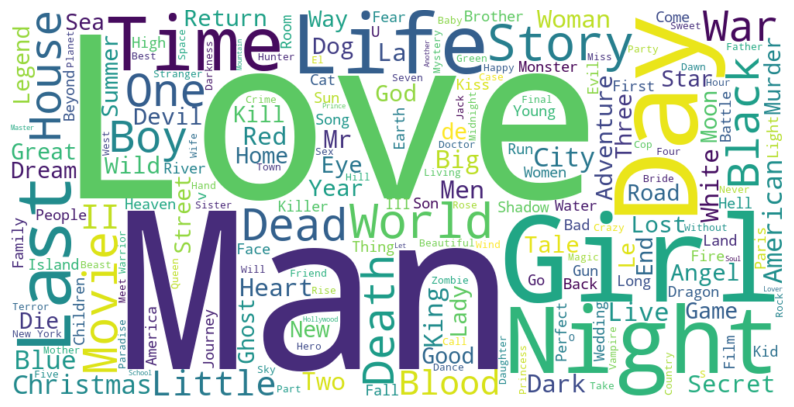

In [22]:
palabras_peliculas = ' '.join(movies.title)
nube = WordCloud(width=1000,height=500, background_color='white').generate(palabras_peliculas)

# Visualizo la nuve de palabras
plt.figure(figsize=(10,7))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

Claramente hay un gran numero de peliculas que contienen en sus titulos las palabras 'Love', 'Man', 'Girl', 'Day', 'Time' entre otras.

Esto sirve como para tener un primer pantallazo de que tipo de peliculas hay en el dataset. Por ejemplo, viendo rapido la nube de palabras puedo deducir que existe una gran cantidad de peliculas romanticas de amor (Love, Girl, Life) o que tambien por ejemlo peliculas de terror o medio (Nigth, Black, Dead, Blood)

### Busqueda de valores atipicos (*outliers*)
Utilizaré varias maneras para detectar outliers en los valores del dataset.

Con un grafico de diagrama de cajas, el *boxplot* se pueden reflejar de manera visual los outliers que tiene una columna en los 'bigotes' de la caja.

In [63]:
movies.sample()

,belongs_to_collection,budget,genres,movie_id,original_language,overview,popularity,production_companies,production_countries,release_date,...,title,vote_average,vote_count,production_countries_code,release_year,release_month,release_day,return,director,actors
34281,NaN,0.0,NaN,143980,hi,Lack-lustred and alcoholic Pratap Narayan Tila...,0.318826,NaN,India,1986-02-27,...,Brave Revolutionary,10.0,1.0,IN,1986,2,27,0.0,Mehul Kumar,Nana Patekar|Dimple Kapadia|Atul Agnihotri|Mam...


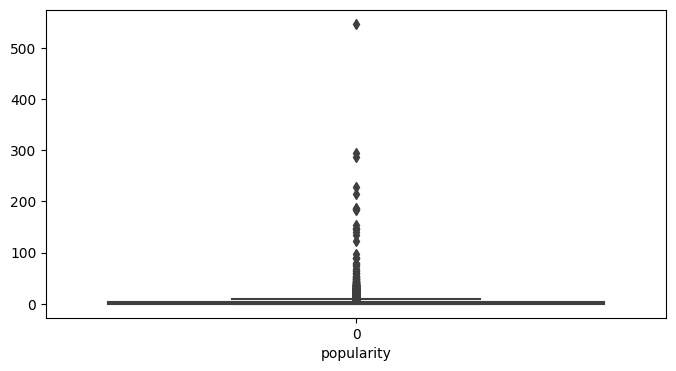

In [69]:
variable = 'popularity'

plt.figure(figsize=(8,4))
sns.boxplot(movies[variable])
plt.xlabel(variable)
plt.show()

Mediante el 'z-score' cuando los valores son mayor a 3